In [1]:
# preamble
from datetime import datetime
start = datetime.now()

## Step 01 > Showing data warngling practice from Unit 4.4

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os

#import data set 'departments.csv'
ICpath = r'C:\Users\joseh\Instacart Basket Analysis'
df_dep = pd.read_csv(os.path.join(ICpath,'02 Data','Original Data','departments.csv'))

### 01.1 Transpose Operation and Renaming Columns

In [3]:
# transpose dept dataframe
df_dep_t = df_dep.T
#df_dep_t            #used to review the operation

In [4]:
#reset the index of dept dataframe
df_dep_t_new = df_dep_t.reset_index()

#save the first entry to be used as new column names
new_header = df_dep_t.iloc[0]

#asign rows 1 through the the end into new data frame
df_dep_t_new = df_dep_t[1:]
df_dep_t_new.columns = new_header

### 01.2 create a data dictionary

In [5]:
#creating a dictionary of departments
dept_dict = df_dep_t_new.to_dict('index')
dept_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [6]:
#showing the dictionary entry 19
print(dept_dict.get('19'))

{'department': 'snacks'}


### 01.3 subsetting the products dataframe

In [7]:
#creating a subset of all products based on department == snacks
df_prods = pd.read_csv(os.path.join(ICpath,'02 Data','Original Data','products.csv'))
df_prods.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices'], dtype='object')

In [8]:
#intermediate step to show basic statistics of products
df_prods.describe()

,product_id,aisle_id,department_id,prices
count,49693.000000,49693.000000,49693.000000,49693.000000
mean,24844.345139,67.770249,11.728433,9.994136
std,14343.717401,38.316774,5.850282,453.519686
min,1.000000,1.000000,1.000000,1.000000
25%,12423.000000,35.000000,7.000000,4.100000
50%,24845.000000,69.000000,13.000000,7.100000
75%,37265.000000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,99999.000000


In [9]:
#creating the slice of products from the department snacks
df_snacks = df_prods[df_prods['department_id']==19]
df_snacks.describe()

,product_id,aisle_id,department_id,prices
count,6264.000000,6264.000000,6264.0,6264.000000
mean,24991.930715,62.937261,19.0,4.259259
std,14282.444982,36.179115,0.0,1.560144
min,1.000000,3.000000,19.0,1.600000
25%,12840.500000,45.000000,19.0,2.900000
50%,24851.500000,61.000000,19.0,4.200000
75%,37276.500000,107.000000,19.0,5.600000
max,49679.000000,125.000000,19.0,7.000000


## Step 02 > Find another identifier variable in the ```df_ords``` dataframe that doesn’t need to be included in your analysis as a numeric variable and change it to a suitable format.

In [10]:
#load orders.csv into the dataframe df_ords
df_ords = pd.read_csv(os.path.join(ICpath,'02 Data','Original Data','orders.csv'))

#displaying the columns and their data types
df_ords.dtypes 

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [11]:
#drop the column eval_set
df_ords2 = df_ords.drop(columns=['eval_set'])
#verifying the column was dropped
df_ords2.dtypes

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [12]:
#changing the order_id column from integer to string:
df_ords2['order_id'] = df_ords2['order_id'].astype('str')
#verifying the change took place
df_ords2.dtypes

order_id                   object
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [13]:
#as expected, order_id does not appear in the summary under the describe method
df_ords2.describe()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


## Step 03 > Look for a variable in your ```df_ords``` dataframe with an _unintuitive_ name and change its name _without overwriting_ the data frame.

In [14]:
#changed dow by "day of the week" --df_ords2 has not been overwritten
df_ords2.rename(columns={'order_dow':'order_day_of_the_week'})

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
3421078,2266710,206209,10,5,18,29.0
3421079,1854736,206209,11,4,10,30.0
3421080,626363,206209,12,1,12,18.0
3421081,2977660,206209,13,1,12,7.0


## Step 04 > Your client wants to know what the busiest hour is for placing orders. Find the frequency of the corresponding variable and share your findings.

In [15]:
# use the method value_counts to determine the number or records by hour of the day
df_ords2['order_hour_of_day'].value_counts()

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

### The maximum number of orders occured at 10am with 288,418 orders (this is the busiest hour)
### The peak hours are from 9 to 16 (9am to 4pm) when we see more than 250K orders. 
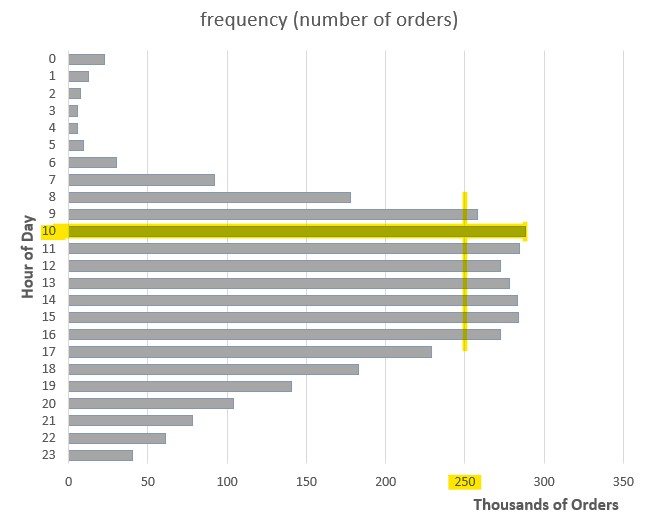

## Step 05 > Determine the meaning behind a value of 4 in the ```department_id``` column within the ```df_prods``` dataframe using a data dictionary.

In [16]:
#the data dictionary for department_id was created in step 1.2 above
print(dept_dict.get('4'))

{'department': 'produce'}


### ```deparment_id```  4 is ```produce```

## Step 06 > The sales team in your client’s organization wants to know more about breakfast item sales. Create a subset containing only the required information.

In [17]:
# from the department dictionary we see that breakfast items are in dept # 14
# '14': {'department': 'breakfast'}

# we need to get a slice of the data frame based on this condition
df_breakfast = df_prods[df_prods['department_id']==14]
#displaying a summary of the slice
df_breakfast

,product_id,product_name,aisle_id,department_id,prices
27,28,Wheat Chex Cereal,121,14,10.1
33,34,NaN,121,14,12.2
67,68,"Pancake Mix, Buttermilk",130,14,13.7
89,90,Smorz Cereal,121,14,3.9
210,211,Gluten Free Organic Cereal Coconut Maple Vanilla,130,14,3.6
...,...,...,...,...,...
49330,49326,Cereal Variety Fun Pack,121,14,9.1
49395,49391,Light and Fluffy Buttermilk Pancake Mix,130,14,2.0
49547,49543,Chocolate Cheerios Cereal,121,14,10.8
49637,49633,Shake 'N Pour Buttermilk Pancake Mix,130,14,14.2


In [18]:
#displaying summary statistics for the slice created
df_breakfast.describe()

,product_id,aisle_id,department_id,prices
count,1116.000000,1116.000000,1116.0,1116.000000
mean,25464.490143,101.517921,14.0,7.848208
std,14271.353221,33.890362,0.0,3.971678
min,28.000000,48.000000,14.0,1.000000
25%,12754.250000,57.000000,14.0,4.400000
50%,26268.000000,121.000000,14.0,7.700000
75%,38035.250000,130.000000,14.0,11.300000
max,49663.000000,130.000000,14.0,14.900000


## Step 07 > They’d also like to see details about products that customers might use to throw dinner parties. Your task is to find all observations from the entire dataframe that include items from the following departments: ```alcohol, deli, beverages, and meat/seafood```. You’ll need to present this subset to your client.

In [19]:
# the categories of interest as represented in the department dictionary
# '5': {'department': 'alcohol'},
# '7': {'department': 'beverages'},
# '12': {'department': 'meat seafood'},
# '20': {'department': 'deli'},

#using the method 'is in' to pass multiple department ids as a list
df_dinner_parties = df_prods[df_prods['department_id'].isin([5,7,12,20])]

#showing the number of record by department id
df_dinner_parties['department_id'].value_counts()

7     4365
20    1322
5     1056
12     907
Name: department_id, dtype: int64

## Step 08 > It’s important that you keep track of total counts in your dataframes. How many rows does the last dataframe you created have?

In [20]:
#printing the number of rows (records)
(rows,cols) = df_dinner_parties.shape
print('the dinner parties data frame has ',rows, ' rows')

the dinner parties data frame has  7650  rows


## Step 09 > Someone from the data engineers team in Instacart thinks they’ve spotted something strange about the customer with a "user_id" of “1.” Extract all the information you can about this user.

In [21]:
#creating a slice of all orders from user_id 1
df_ords2[df_ords2['user_id']==1]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
5,3367565,1,6,2,7,19.0
6,550135,1,7,1,9,20.0
7,3108588,1,8,1,14,14.0
8,2295261,1,9,1,16,0.0
9,2550362,1,10,4,8,30.0


## Step 10 > You also need to provide some details about this user’s behavior. What basic stats can you provide based on the information you have?

User_id 1 has these characteristics
* places orders usually from Monday (day 1) to Thursday (day 4) with higher frequency on Thursday (day 4) --avoiding weekends
* places orders typically every 3 weeks (median of days between orders = 19.5)
* places orders usually in the morning (7 out of 11 times between 7am and 9am)

In [22]:
#using the describe method to get summary statistics
df_ords2[df_ords2['user_id']==1].describe()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,11.0,11.000000,11.000000,11.000000,10.000000
mean,1.0,6.000000,2.636364,10.090909,19.000000
std,0.0,3.316625,1.286291,3.477198,9.030811
min,1.0,1.000000,1.000000,7.000000,0.000000
25%,1.0,3.500000,1.500000,7.500000,14.250000
50%,1.0,6.000000,3.000000,8.000000,19.500000
75%,1.0,8.500000,4.000000,13.000000,26.250000
max,1.0,11.000000,4.000000,16.000000,30.000000


## Step 11 > Check the organization and structure of your notebook. Be sure to include section headings and code comments.

Done

## Step 12 > Export your df_ords dataframe as “orders_wrangled.csv” in your “Prepared Data” folder.

In [23]:
#exporting the df_ords2 (without the column eval_set)
df_ords2.to_csv(os.path.join(ICpath, '02 Data','Prepared Data', 'orders_wrangled.csv'))

## Step 13 > Export the df_dep_t_new dataframe as “departments_wrangled.csv” in your “Prepared Data” folder so that you have a “.csv” file of your departments data in the correct format.

In [24]:
#exporting the modified deparments data frame
df_dep_t_new.to_csv(os.path.join(ICpath, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [25]:
# fyi only - to track performance of this notebook 
print(' time to run this notebook h:mm:ss: ', datetime.now() - start)

 time to run this notebook h:mm:ss:  0:00:14.941661


In [27]:
df_ords2.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [28]:
df_ords2.shape

(3421083, 6)